
# SUBGRID SPATIAL VARIABILITY OF THE AOD AND THE ANGSTRÖM EXPONENT IN THE ARCTIC

## NeGI - Andøya - 2018

Paulina Tedesco:
paulinatedesco@gmail.com

Group assistants: Jonas Gliss and Betsy Andrews

# Abstract



The spatial variability of the AOD and the Angström exponent within the boundaries of a grid box located in the Arctic was investigated by comparing AERONET observations to reanalysis and model output. The bias calculated by comparing two AERONET stations is smaller than the bias of the model compared to one of the measurements of one of the stations. Furthermore, the AOD bias is lower than the Angström exponent bias. A high-resolution model (SPTINTARS-T213) was compared to the ECMWF-IFS reanalysis. The ECHAM5.3-OSLO model was also examined but left out of the analysis because it underestimates the AOD considerably.

A linear regression analysis was applied using the Ordinary Least Squares (OLS)approach. The results indicate that there is a high correlation for the AOD between the AERONET stations (R-squared = 0.91) and relatively high for the ECMWF-IFS compared to one of the stations (R-squared = 0.32). The performance of the OLS is not so good for the Angström exponent resulting in a lower variance explained for the AERONET station (R-squared = 0.42) and almost no variance explained for the ECMWF-IFS (0.46).

Finally, a high AOD event that occurred the 1st of July was studied. Both models, SPRINTARS and ECMWF-IFS, capture a high AOD signal in northern Canada. The aerosols seem to be advected from where the fires originated to the AERONET sites, but the SPRINTARS shows a maximum further north.


# Introduction

Many studies reveal that there exist differences in simulated aerosol climate effects between high- and low-resolution models due to subgrid aerosol variability (e.g. Anderson et al., 2003; Weigum et al., 2012). By running the WRF-Chem and isolating the effect of aerosol variability from other sources of model variability, Weigum, N., Schutgens, N., and Stier, P (2016) demonstrate that AOD is underestimated by 13 % when aerosol and gases are simulated at 80 km resolution compared to 10 km; this difference is larger for lower resolution models. They also prove that when variability on scales smaller than a grid box is neglected, non-linearity of processes like gas-phase chemistry and aerosol uptake of water through aerosol–gas equilibrium reactions result in large changes in aerosol properties, which are exaggerated by convective transport.

Wang, R., Andrews, E., Balkanski, Y., Boucher, O., Myhre, G., Samset, B. H., et al. (2018) investigate the uncertainty in the direct radiative forcing of black carbon (BC). They evaluated the spatial representativeness error for local measurements of the networks AERONET and Global Atmosphere Watch (GAW) with a global black carbon model at a resolution of 2° × 2° by downscaling BC aerosol absorption optical depth to 0.1° × 0.1°. The global representativeness error (RE) for AERONET sites is 30%, while the representativeness error for GAW is 7%. The difference relies on the fact that the GAW sites are located in such a way that the stations with negative representative error compensate for those with a positive representative error.

Given the high resolution annual mean of BC AAOD (in this case, the scaled BC AAOD at the 0.1° × 0.1° are used in absence of global high resolution-observations), $C_{high-res}$, , and the annual mean of BC AAOD over a low-resolution grid box of g° × g° (estimated as the average over n = (10 g)2 0.1° × 0.1° grid boxes with the monitoring site closest to the center), $C_{low-res}$, the relative error ($RE$) is defined as follows:

\begin{equation}
   RE = \frac{C_{high-res}-C_{low-res}}{C_{low-res}}
\end{equation}

An RE of zero indicates that the site is perfectly representative of the coarse grid box.

The subgrid spatial variability in the Arctic, more specific, in Eureka, northern Canada, is presented in this study, by using AERONET measurements of AOD and Angström exponent at the stations Pearl and Opal, the ECMWF-IFS reanalysis, the SPRINTARS-T213, and MODIS-AQUA images. An Ordinary Least Squares (OLS) analysis is performed for comparing the AERONET time series and the models. A higher correlation between the stations than between one station and the models is expected. the bias is also calculated for the different data sets compared to the observations in Pearl. Finally, a case study is considered, showing the performance of the models, and the differences between them, when a large amount of aerosols is detected over the selected sites.

This report is structured as follows. The packages and data sets are presented in section Methods. The Analysis section gives an overview of the OLS approach and the metric used to evaluate the performance. The main part of this study relies on the Results, where all the figures and calculations are shown, summarized in Discussion and Outlook. Finally, the most important Conclusions are expressed. The references are provided at the end of the report.


# Methods



## Python libraries and frameworks

A list of the libraries used in this study follows below.

### Standard libraries

In [1]:
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import warnings
import cartopy.crs as ccrs
import pandas as pd
from datetime import datetime
from dateutil.parser import parse

In [2]:
# comment the following line to see the warnings
warnings.filterwarnings("ignore")

### Pyaerocom

In [3]:
import pyaerocom as pya

Employing pyaerocom, in addition to the widely used python libraries listed above, facilitated the processing and plotting of data. This is part of the AEROCOM-project, "an open international initiative of scientists interested in the advancement of the understanding of the global aerosol and its impact on climate" (read more on http://aerocom.met.no/). 

The following packages are required in order to install pyaerocom:
- iris >= 2.0.0
- xarray >= 0.10.8
- pandas >= 0.22.0 (comes with iris)
- cartopy >= 0.16.0 (comes with iris)
- netcdf4 >= 1.4.0 (comes with iris)
- cf_units >= 2.0.1 (comes with iris)
- numpy >= 1.14 (comes with iris)
- matplotlib >= 3.0.1 (Note: please avoid matplotlib v3.0.0 due to this issue)
- seaborn >= 0.8.1

Data will not be accessed directly from the AEROCOM database, only the files saved for this project will be used. For access to the data, please contact jonasg@met.no.

For more information about pyaerocom, please refer to the official website http://aerocom.met.no/pyaerocom/

## My functions

Python functions are written with the aim of providing a clearer structure of the report. They are mainly used to plot and process the data and rely on most of the packages listed above, including pyaerocom. These functions are imported in the next lines.

In [4]:
from station_map import station_map
from nobs import read_nobs
from nobs import plot_nobs
from nobs import write_df
from plot_aeronet_aod import plot_aeronet_aod
from linreg import ols
from loc_opal_pearl import print_loc

## Datasets

In this project, we compare AOD and Angstrõm exponent AERONET observations in the Arctic with three models, ECMWF-IFS reanalysis, ECMWF5.3-OSLO, and SPRINTARS. The files can be found in NIRD, see the paths below, or by accessing the AEROCOM database directly.

### Paths to the AERONET data in the JupyterHub

In [5]:
obs_dir = ('/mnt/data/inputs/pyaerocom-testdata/obsdata/' \
           'AeronetSunV3Lev2.0.daily/renamed')

svalbard_files = ['Hornsund.lev30', 'Longyearbyen.lev30', "Ny_Alesund.lev30"]
svalbard_path_list = [obs_dir + '/' + s for s in svalbard_files]

eureka_files = ['OPAL.lev30', 'PEARL.lev30']
eureka_path_list = [obs_dir + '/' + s for s in eureka_files]

dragon_path_list = glob.glob(os.path.join(obs_dir,'DRAGON*.lev30'))

### Paths to the model data in the JupyterHub

In [6]:
ecmwf_dir = ('/mnt/data/inputs/pyaerocom-testdata/' \
             'modeldata/ECMWF_CAMS_REAN/renamed/')
ecmwf_path_list = glob.glob(
    os.path.join(ecmwf_dir, 'ECMWF_CAMS_REAN.daily.od550aer.2*.nc'))
ecmwf_path_list.sort()

ecmwf_dir_ang = ('/mnt/data/inputs/pyaerocom-testdata/' \
                 'modeldata/ECMWF_CAMS_REAN/renamed/')
ecmwf_path_list_ang = glob.glob(
    os.path.join(ecmwf_dir, 'ECMWF_CAMS_REAN.daily.ang4487aer.2*.nc'))
ecmwf_path_list_ang.sort()

cam53_dir = ('/mnt/data/inputs/pyaerocom-testdata/modeldata/CAM53-Oslo_7310_MG15CLM45_5feb2017IHK_53OSLO_PD_UNTUNED/renamed/')
cam53_path_list = glob.glob(os.path.join(cam53_dir, '*_od550csaer_Column_2*.nc'))
cam53_path_list.sort()

sprintars_path_list = ['/mnt/data/inputs/pyaerocom-testdata/modeldata/' \
                       'SPRINTARS-T213_AP3-CTRL2016-PD/renamed/' \
                       'aerocom3_SPRINTARS-T213_AP3-CTRL2016-' \
                       'PD_od550aer_Column_2010_3hourly.nc']

### Observations

#### AERONET

The AERONET (AErosol RObotic NETwork) project provides, among a large set of other variables, ground-based remote sensing observations of spectral aerosol optical depth (AOD), inversion products, and precipitable water in diverse aerosol regimes AERONET is an observing system in the NOAA Observing System Architecture with its origins in the late 1980s. It was established by NASA and PHOTONS (PHOtométrie pour le Traitement Opérationnel de Normalisation Satellitaire) and counts with the support of several collaborators and partners.

The AERONET stations are equipped with a sunphotometer that measures sun and sky radiance signals. The sun and sky radiance signals are transformed to opto-physical quantities (aerosol optical depth and absolute sky radiance) and then transmitted to the AERONET database as part of an automated AERONET protocol. Figure 1 shows the sunphotometer system at Avignon. A handbook to the Cimel Sunphotometer can be found here: https://www.arm.gov/publications/tech_reports/handbooks/csphot_handbook.pdf

In this study, we use version 3.0, level 2.0, clear-sky AOD data at 550 $\eta m$ and angström exponent derived for the range 870-440 $\eta m$. The level 2.0 data is pre- and post-field calibrated, cloud-screened, and quality-assured. The spectral channels are evaluated for filter degradation, other possible instrumental problems, or data anomalies; and the AOD data are inspected for possible cloud contaminated outliers. Data usage and guidelines can be found here: https://aeronet.gsfc.nasa.gov/new_web/data_usage.html


<img src="files/images/avignon3.jpg">

*Fig. 1: The AERONT sunphotometer system. Source: AERONET.*

 <center *Fig. 1: The AERONET station*>

##### Read the observations 

The observations are read using the pyaerocom library.

In [7]:
reader = pya.io.ReadAeronetSunV3()
svalbard_data = reader.read(files=svalbard_path_list, 
                            vars_to_retrieve=['od550aer', 'ang4487aer'])
eureka_data = reader.read(files=eureka_path_list, 
                          vars_to_retrieve=['od550aer', 'ang4487aer'])
dragon_data = reader.read(files=dragon_path_list, 
                          vars_to_retrieve=['od550aer', 'ang4487aer'])

Reading file 0 of 3 (ReadAeronetSunV3)
Reading file 1 of 3 (ReadAeronetSunV3)
Reading file 2 of 3 (ReadAeronetSunV3)
Reading file 0 of 2 (ReadAeronetSunV3)
Reading file 1 of 2 (ReadAeronetSunV3)
Reading file 0 of 135 (ReadAeronetSunV3)
Reading file 13 of 135 (ReadAeronetSunV3)
Reading file 26 of 135 (ReadAeronetSunV3)
Reading file 39 of 135 (ReadAeronetSunV3)
Reading file 52 of 135 (ReadAeronetSunV3)
Reading file 65 of 135 (ReadAeronetSunV3)
Reading file 78 of 135 (ReadAeronetSunV3)
Reading file 91 of 135 (ReadAeronetSunV3)
Reading file 104 of 135 (ReadAeronetSunV3)
Reading file 117 of 135 (ReadAeronetSunV3)
Reading file 130 of 135 (ReadAeronetSunV3)


Before commencing the analysis, we need to find a group of AERONET stations that are located close to each other, so that we can compare the measurements to a certain grid box of the models selected. The map in figure 2 exhibits the locations of two groups of AERONET stations in our area of interest, the Arctic. There are three stations in Svalbard (Hornsund, Longyearbyen, and Ny Ålesund), marked with red stars, and two stations in Eureka (Opal and Pearl), marked with blue triangles. The locations for the DRAGON campaigns are shown in green, but these are not in the Arctic. However, it would be of interest to compare the data of these stations with the models in a future study.

The map is plotted using pyaerocom functions called in station_map.py.

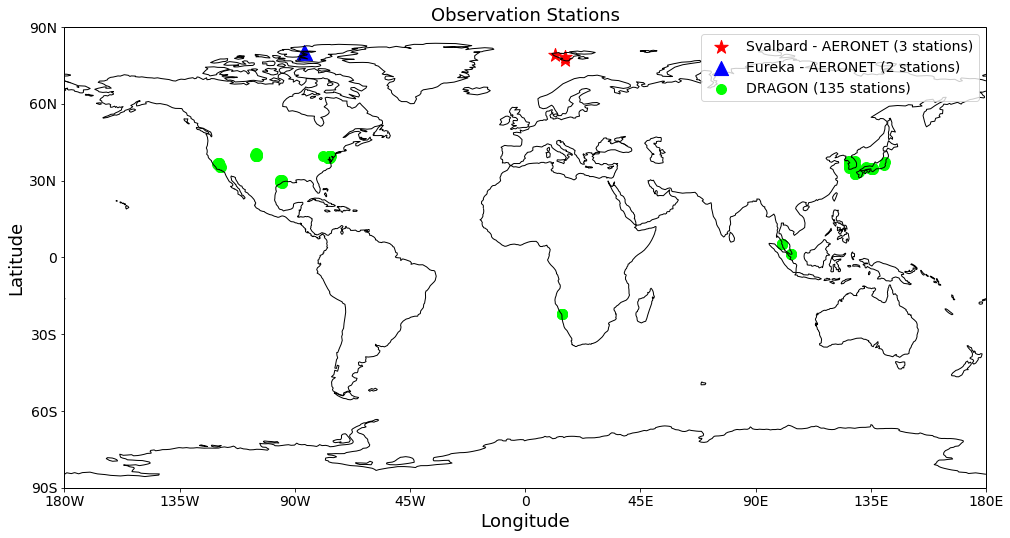

In [8]:
station_map(svalbard_data=svalbard_data, 
            eureka_data=eureka_data, dragon_data=dragon_data)

*Fig. 2: Map of two groups of AERONET stations in the Arctic and the DRAGON campaigns.* 

Unfortunately, the time series on Svalbard do not overlap during a long enough period (see next Fig. 3). For that reason, only the stations Opal and Pearl are used in the analysis.

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 

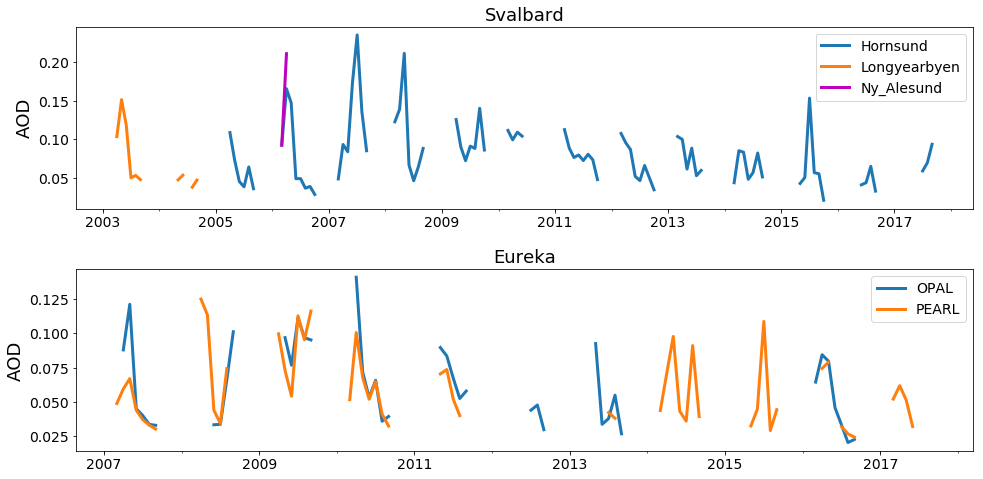

In [9]:
plot_aeronet_aod(svalbard_data=svalbard_data, eureka_data=eureka_data)

*Fig. 3: Monthly averaged AOD time series for the stations in Svalbard (upper panel) and Eureka (lower panel).*

In [10]:
print_loc(Opal=eureka_data['OPAL'], Pearl=eureka_data['PEARL'])

Location of Opal:  79.99 N,  -85.94 E
Location of Pearl:  80.05 N,  -86.42 E
Altitude of Opal:  5.0 m
Altitude of Pearl:  615.0 m


The sites of the two stations in Eureka are very proximate, however, there is a difference of 610 m of altitude between them. The fact that the elevation of Opal is considerably lower than that of Pearls explains the higher AOD values in Opal (Fig. 3).

The figure above shows the monthly average of AOD at the AERONET stations in Svalbard and Eureka. The daily data can be explored in the interactive plots shown below. Notice the monthly variability in number of observations. The years with more observations are 2009-2011.

In [11]:
def plot_year(data, year=2004):
    try:
        stations=data.to_station_data_all(start=year, freq='daily')
        stations[0].od550aer.plot()
        stations[1].od550aer.plot()
    except:
        print('Failed to access data for {}'.format(year))
        
from ipywidgets import interact, fixed
interact(plot_year, data=fixed(eureka_data), year=np.arange(2007, 2016))

interactive(children=(Dropdown(description='year', options=(2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 20…

<function __main__.plot_year(data, year=2004)>

*Interactive plot 1: Daily AOD data in Opal and Pearl.*

#### MODIS-AQUA

MODIS data is also read using pyaerocom. The following interactive maps exhibit global AOD. Time stamps, maximum and minimum values can be controlled.

In [12]:
from ipywidgets import interact
pya.const.BASEDIR = '/mnt/data/inputs/pyaerocom-testdata/'

modis_data = pya.io.ReadGridded('MODIS6.aqua').read_var('od550aer')

# Interactive plot
fig = plt.figure(figsize=(10, 6))
interact(modis_data.quickplot_map, time_idx=(80, 120), xlim=fixed((-180, 180)), 
         ylim=fixed((-90, 90)), vmin=(0, 0.5), vmax=(0.5, 1.5), log_scale=fixed(True),
         add_zero=True, fig=fixed(fig))

/opt/conda/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

interactive(children=(IntSlider(value=80, description='time_idx', max=120, min=80), FloatSlider(value=0.25, de…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

It is also possible to zoom into our region of interest.

In [13]:
fig = plt.figure(figsize=(10, 6))
interact(modis_data.quickplot_map, 
         time_idx=(80, 200), xlim=fixed((-100, 0)), 
         ylim=fixed((30, 90)), vmin=(0, 0.5), 
         vmax=(0.5, 1.5), log_scale=fixed(True),
         add_zero=True, fig=fixed(fig))

<Figure size 720x432 with 0 Axes>

interactive(children=(IntSlider(value=80, description='time_idx', max=200, min=80), FloatSlider(value=0.25, de…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

### Models

#### ECMWF - IFS Reanalysis

The Observations are compared to the ECMWF-IFS Reanalysis. The time stamps cannot be extracted from the netcdf files, but they are available trough pyaerocom. In the next subsection, we add the timestamps to the gridded data.

##### Concatenate the timestamps for all the files


In [14]:

for i, path in enumerate(ecmwf_path_list):
    ecmwf_data = pya.GriddedData(ecmwf_path_list[i])
    time_stamps_i = ecmwf_data.time_stamps()
    if i == 0:
        time_stamps = time_stamps_i
    else:
        time_stamps = np.concatenate((time_stamps, time_stamps_i), 
                                     axis=0, out=None)  

for i, path in enumerate(ecmwf_path_list_ang):
    ecmwf_data_ang = pya.GriddedData(ecmwf_path_list[i])
    time_stamps_i = ecmwf_data_ang.time_stamps()
    if i == 0:
        time_stamps_ang = time_stamps_i
    else:
        time_stamps_ang = np.concatenate((time_stamps_ang, time_stamps_i), 
                                         axis=0, out=None)  

##### Open the files and add time stamps

The time coordinate in the netcdf files is missing, so they have to be added using pyaerocom.

In [15]:
# AOD
ecmwf_data = xr.open_mfdataset(ecmwf_path_list, 
                               chunks=None, concat_dim='time')
ecmwf_data.coords['time']= pd.to_datetime(time_stamps)

# Angström exponent
ecmwf_data_ang = xr.open_mfdataset(ecmwf_path_list_ang, 
                                   chunks=None, concat_dim='time')
ecmwf_data_ang.coords['time']= pd.to_datetime(time_stamps_ang)


#### ECMWF CAM5.3 OSLO

Another model used in the analysis is the ECMWF CAM5.3-OSLO. Details can be found in the paper written by Kirkevåg et al. (2018): https://www.geosci-model-dev.net/11/3945/2018/gmd-11-3945-2018.pdf

##### Open files using xarray

In [16]:
cam53_data = xr.open_mfdataset(cam53_path_list, 
                               chunks=None, concat_dim='time')

#### SPRINTARS-T213

A higher resolution model was also employed in the analysis. SPRINTARS-T213 has a 0.5625x0.5625 degrees horizontal resolution.

##### Open files using xarray

In [17]:
sprintars_data = xr.open_mfdataset(sprintars_path_list, 
                                   chunks=None, concat_dim='time')

## Analysis

Basic statistical analysis is performed on this study. 

### Ordinary Least Squares (OLS)

An OLS analysis of AOD and Angström exponent was performed for the AERONET data of the stations Pearl and Opal, and for AERONET and model data (see section Results).


The best fit is given by the $\hat{\beta}$-values that minimize the residual sum of squares, which is the cost function in this case. The minimum is found by differentiating the RSS with regards to $\beta$ and setting it equal to zero. 


\begin{equation}
    \hat{Y} = \hat{\beta_0} + \sum_{j=1}^p X_j\hat{\beta_j}
\end{equation}


$\hat{Y}$ denotes the predicted model given the input \textbf{X}. $\hat{\beta_0}$ is the intercept also known as the bias in machine learning.


\begin{equation}
    RSS(\hat{\beta}) = \left( \textbf{y}-\textbf{X}\beta \right)^T\left( \textbf{y}-\textbf{X}\beta \right)
\end{equation}


Finally, solving for $\hat{\beta}$ results in the following equation. This has a unique solution when $\left( \textbf{X}^T\textbf{X} \right)$ is non-singular. A matrix is non-singular when \textbf{$X^TX$} has full rank, then all the columns are linearly independent and the matrix is invertible. \cite{statisticalLearning}


\begin{equation}
    \hat{\beta} = \left( \textbf{X}^T\textbf{X} \right)^{-1}\textbf{X}^T\textbf{y}
\end{equation}

The residuals are calculated as $\hat{Y} - y$.

The $R^2$-score is used to quantify the performance of the model. When the models performance approaches the true value, the $R^2$ goes to one.

\begin{equation}
    R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2}
\end{equation} 
where mean value of $\hat{y}$ is defined as $\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i$. 

## Results

### Plot the number of observations

As mentioned above, there is a large variability in the number of observations. This is shown with more details in the following figure.

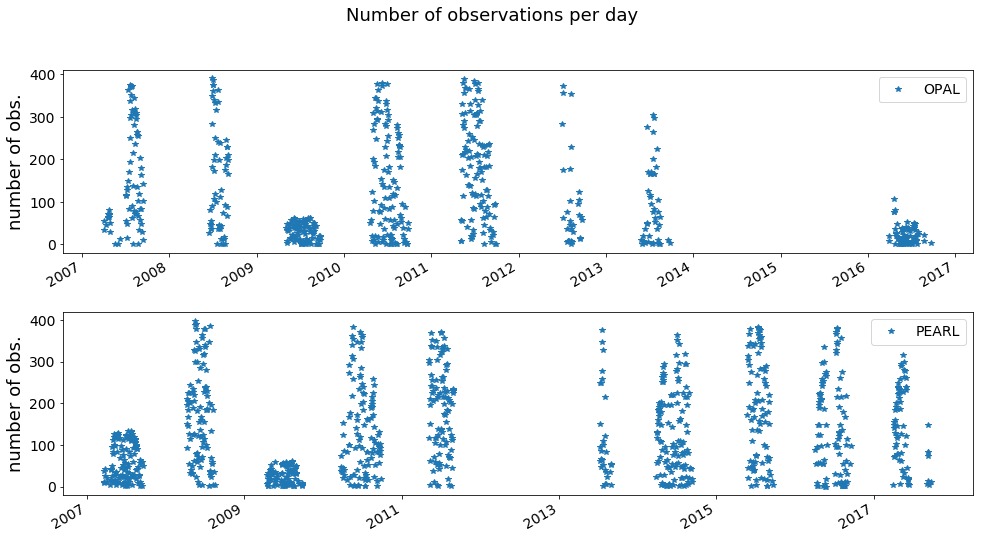

In [18]:
var_code = ['N[AOD_500nm]']

# uncomment these lines to see the numbers of observartions 
# for the angstrom exponent.
# var_code = ['N[AOD_500nm]', 'N[440-870_Angstrom_Exponent]']    
                                                                
var_name = ['aod', 'ang']
num_obs = plot_nobs(var_code, var_name, eureka_path_list, eureka_data)

# plt.savefig('results/num_obs_daily.png')

*Fig. 4: Time series of number of observations in the stations Opal (upper panel) and Pearl (lower panel)*

From figure 4, we select the years 2007-2011, when we have more simultaneous observations in both stations. Overall, 366 observations coincide in Opal and Pearl. 

In  2009, there are, surprisingly, not so many observations compared to the rest of the years. Since we are looking at clear-sky observations, it would be interesting to determine whether this is due to a particular event or a problem with the instruments.

#### Write the data in a data frame

#####   Remove NaNs and records with less than 10 measurements. Append AOD and Angstrom exponent to the data frame num_obs

In [19]:
lat_pearl = eureka_data['PEARL'].latitude
lon_pearl = eureka_data['PEARL'].longitude
num_obs, ecmwf_aod_PEARL = write_df(num_obs, 
                                    eureka_data, ecmwf_data, ecmwf_data_ang, 
                                    sprintars_data, lat_pearl, lon_pearl)


#### Normalized distribution of the difference of number of observations between Opal and Pearl

Text(0.5,1,'Difference of nr. observations (normalized) \n Opal-Pearl')

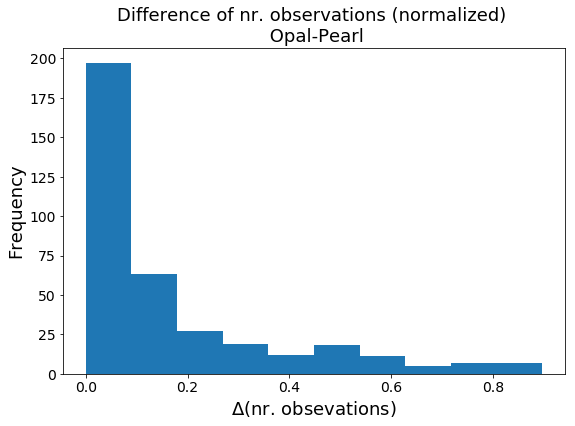

In [20]:
fig = plt.figure(figsize=(9, 6))
num_obs['diff_nobs'] = abs(num_obs['nobs_aod_OPAL'] - 
                           num_obs['nobs_aod_PEARL'])
max_obs = num_obs.max().max()
num_obs['diff_nobs'] = num_obs['diff_nobs']/max_obs
plt.hist(num_obs['diff_nobs'])
plt.xlabel(r'$\Delta$(nr. obsevations)')
plt.ylabel('Frequency')
plt.title('Difference of nr. observations (normalized) \n Opal-Pearl')
# plt.savefig('results/hist_delta_nobs.png')

*Fig. 5: Empirical distribution of the normalized difference of number of observations between Opal and Pearl.*

The skewed distribution in figure 5 indicates that for most of the days selected the number of observations is similar for both stations. However, it is possible to find some days when the number of observations at one of the stations is much larger than at the other.

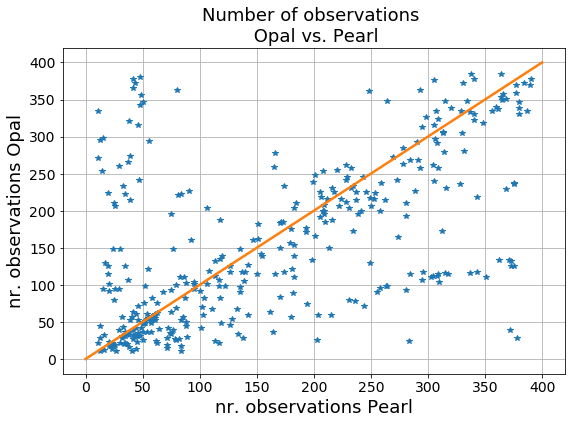

In [21]:
fig = plt.figure(figsize=(9, 6))
plt.plot(num_obs['nobs_aod_OPAL'], num_obs['nobs_aod_PEARL'], '*')
plt.xlabel('nr. observations Pearl')
plt.ylabel('nr. observations Opal')
x = (0, 400)
plt.plot(x, x, linewidth=2.5)
plt.title('Number of observations \n Opal vs. Pearl')
plt.grid()
#plt.savefig('results/scatter_nobs_opal_pearl.png')

*Fig. 6: scatterplot of number of observations in Opal vs. Pearl*

Although there are many points around the 1:1 line there are also some days with few observations in Pearl an many observations in Opal and vice versa. 

#### Bias as a function of the difference of number of observations

Since there are differences in the number of observations, it is intuitive to investigate the bias as a function of this difference, but the scatter plot in figure 7 shows no evident pattern.

Text(0.5,1,'AOD bias (Opal-Pearl)')

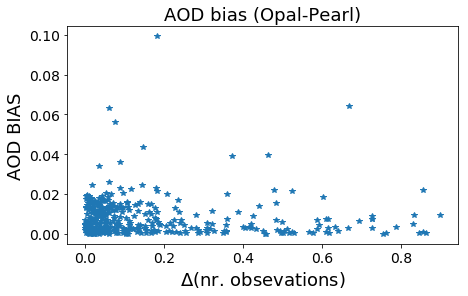

In [22]:
fig = plt.figure(figsize=(7, 4))
num_obs['bias_aod'] = abs(num_obs['aod_OPAL'] - 
                          num_obs['aod_PEARL'])
plt.plot(num_obs['diff_nobs'], num_obs['bias_aod'], '*')
plt.ylabel('AOD BIAS')
plt.xlabel(r'$\Delta$(nr. obsevations)')
plt.title('AOD bias (Opal-Pearl)')
#plt.savefig('results/scatter_bias_nobs.png')

*Fig. 7: Bias as a function of the difference of number of observations between the stations Opal and Pearl.*

### Linear Regression

#### AOD

##### AERONET Pearl -  AERONET Opal

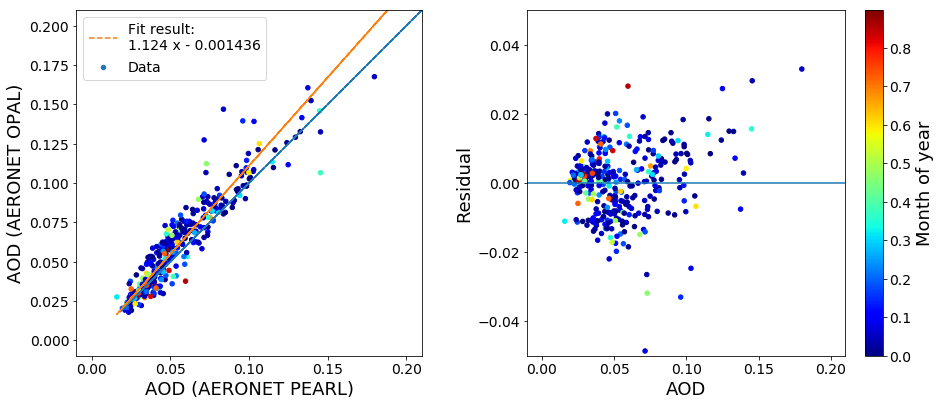

AOD R-square coefficient (AERONET Pearl, AERONET Opal): 0.91


In [23]:
x = num_obs['aod_PEARL']
y = num_obs['aod_OPAL']

r2 = ols(x, y, num_obs['diff_nobs'],'AOD', 
         'AERONET PEARL', 'AERONET OPAL', 
         data_var = 'aeronet_aod', col_label= r'$\Delta$(nr. obsevations)')
print('AOD R-square coefficient (AERONET Pearl, AERONET Opal):', round(r2, 2))

*Fig. 8: OLS fit of AOD data from the AERONET stations Opal and Pearl (left panel) and the residuals (right panel). The colors represent the difference of number of observations between the stations.*

Figure 8 indicates, as expected, that the AOD measurements in Opal and Pearl are correlated. Almost all the points are close to the 1:1 line and the R-squared coefficient is high, 0.91. Again, looking at the colors, there is no evident pattern for the difference of number of observations. From the residual plot in the right panel, we can deduce that the fit is better for low values of AOD.

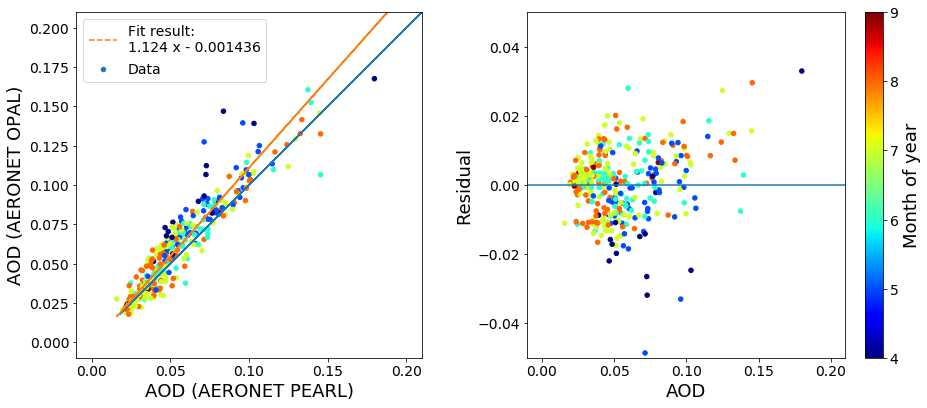

In [24]:
x = num_obs['aod_PEARL']
y = num_obs['aod_OPAL']
r2 = ols(x, y, num_obs.index.month,'AOD', 
         'AERONET PEARL', 'AERONET OPAL', 
         data_var = 'aeronet_aod', col_label='Months of the year')
#plt.savefig('results/regression_pearl_opal.png')

*Fig. 9: Same as figure 8, but the colors represent the Months of the year.*

Figure 9 is plotted for the same data, but now the colors represent the months of the year. It is clear that the lowest values of AOD are measured during the summer, while larger AOD values are measured in spring (probably due to Arctic haze). The fit is better during the summer.

##### AERONET Pearl -  ECMWF-IFS Pearl

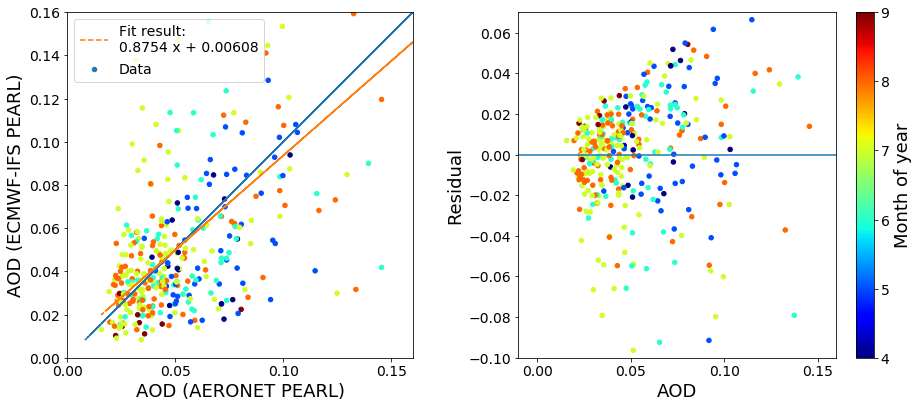

AOD R-square coefficient (AERONET Pearl, ECMWF Pearl): 0.32


In [25]:
x = num_obs['aod_PEARL']
#x = num_obs['aod_OPAL']
y = num_obs['ecmwf_aod_PEARL']
r2 = ols(x, y, num_obs.index.month,'AOD', 
         'AERONET PEARL', 'ECMWF-IFS PEARL', 
         data_var = 'ecmwf_aod', col_label='Months of the year')
print('AOD R-square coefficient (AERONET Pearl, ECMWF Pearl):',
      round(r2, 2))
#plt.savefig('results/regression_pearl_ecmwf.png')

*Fig. 10: OLS fit of AOD data from the ECMWF-IFS and the AERONET station in pearl Pearl (left panel) and the residuals (right panel). The colors represent the difference of number of observations between the stations.*

The fit between model data and observations is not as good as for the two AERONET stations. The data points are spread, and the R-squared coefficient is 0.32. Still, almost one-third of the variance is explained, providing useful information. The figure shows also that the model has a tendency to overestimate AOD in summer and underestimate it in spring.

#### Angström exponent

The same analysis is performed for the Angström exponent.

##### AERONET Pearl -  AERONET Opal

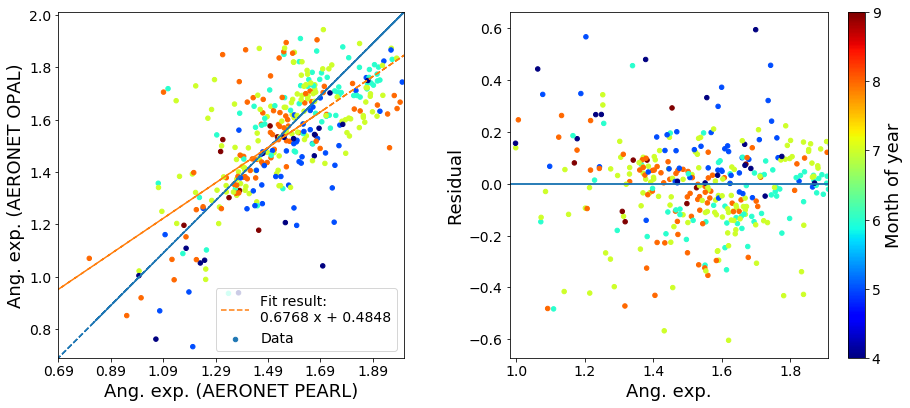

Ang. exp. R-square coefficient (AERONET Pearl, AERONET Opal): 0.46


In [26]:
x = num_obs['ang_PEARL']
y = num_obs['ang_OPAL']
r2 = ols(x, y, num_obs.index.month,'Ang. exp.', 
         'AERONET PEARL', 'AERONET OPAL', 
         data_var = 'aeronet_ang', col_label='Months of the year')
print('Ang. exp. R-square coefficient (AERONET Pearl, AERONET Opal):',
      round(r2, 2))
#plt.savefig('results/regression_ang_pearl_opal.png')

*Fig. 11: Same as figure 9, but for the Angström exponent.*

Figure 11 reveals that the OLS fit between the AERONET stations for the Angström exponent. The fit is not so good as it is for the AOD, resulting in an R-squared equal to 0.46, approximately the half. It is evident from the figure that the Angström exponent is lower in Opal than in Pearl during the spring, but higher during the summer. Furthermore, the data seems to be less correlated when the Angström exponent is low.

##### AERONET Pearl -  ECMWF-IFS Pearl

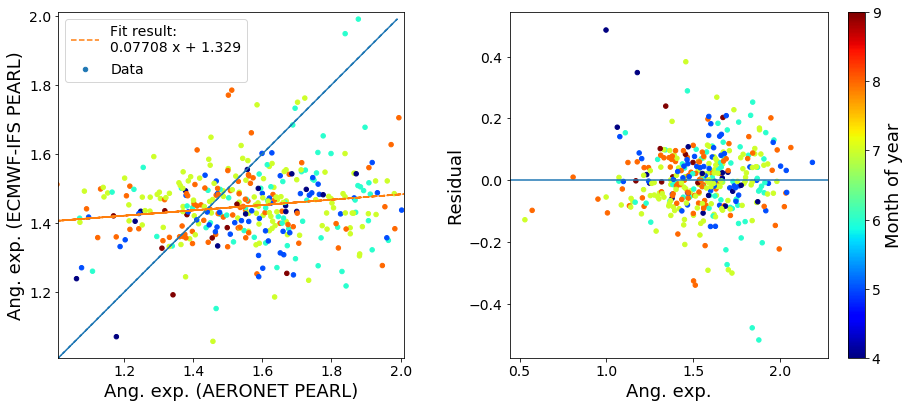

Ang. exp. R-square coefficient (AERONET Pearl, ECMWF Pearl): 0.03


In [27]:
x = num_obs['ang_PEARL']
#x = num_obs['ang_OPAL']
y = num_obs['ecmwf_ang_PEARL']
r2 = ols(x, y, num_obs.index.month,'Ang. exp.', 
         'AERONET PEARL', 'ECMWF-IFS PEARL', 
         data_var = 'ecmwf_ang', col_label='Months of the year')
print('Ang. exp. R-square coefficient (AERONET Pearl, ECMWF Pearl):', 
      round(r2, 2))
#plt.savefig('results/regression_ang_pearl_ecmwf.png')

*Fig. 12: Same as figure 10, but for the Angström exponent.*

We deduce from figure 12 that the ECMWF-IFS model does not estimate correctly the Angström exponent at Pearl, and the variance explained is almost zero. It is, therefore, recommendable to investigate the reasons why the fit is poor.

### Time series

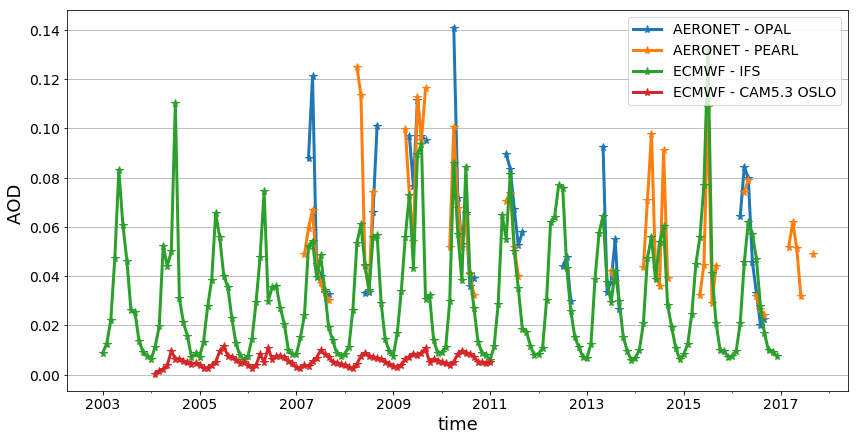

In [28]:
fig = plt.figure(figsize=(14,7))
#fig.suptitle('AOD at 77.5N, 15E in 2010',  y=1.05, fontsize=17)

eureka_data[0].od550aer.resample('M').mean().plot(
    label='AERONET - OPAL', linewidth=3, marker='*', markersize=8)
eureka_data[1].od550aer.resample('M').mean().plot(
    label='AERONET - PEARL', linewidth=3, marker='*', markersize=8)

time_series = ecmwf_data['od550aer'].sel(
    lat=eureka_data['PEARL'].latitude, 
    lon=360+eureka_data['PEARL'].longitude, method='nearest')
time_series.to_series().resample('M').mean().plot(
    linewidth=3, label='ECMWF - IFS', marker='*', markersize=8)

time_series2 = cam53_data['od550csaer'].sel(
    lat=eureka_data['PEARL'].latitude, 
    lon=360+eureka_data['PEARL'].longitude, method='nearest')
time_series2.to_series().resample('M').mean().plot(
    linewidth=3, label='ECMWF - CAM5.3 OSLO', marker='*', markersize=8)

plt.grid(True, axis='y')
plt.ylabel('AOD ')
plt.legend()

#plt.savefig('results/long_timeseries_aod.png')

*Fig. 13: Monthly averaged AOD time series (observations and models).*

The time series plotted in figure 13 shows that the EXMWF-CAM5.3-OSLO underestimates the AOD resulting in values of one order of magnitude lower than the observed by the sunphotometers (consistent with previous studies: cite!!). As a consequence, this model is left out of the analysis. The remaining curves present a peak in the spring, and most of them, present a second one during the summer. It would be interesting to investigate the reasons for this second peak, which does not follow the theory. In some years, it could be related to volcanic eruptions.

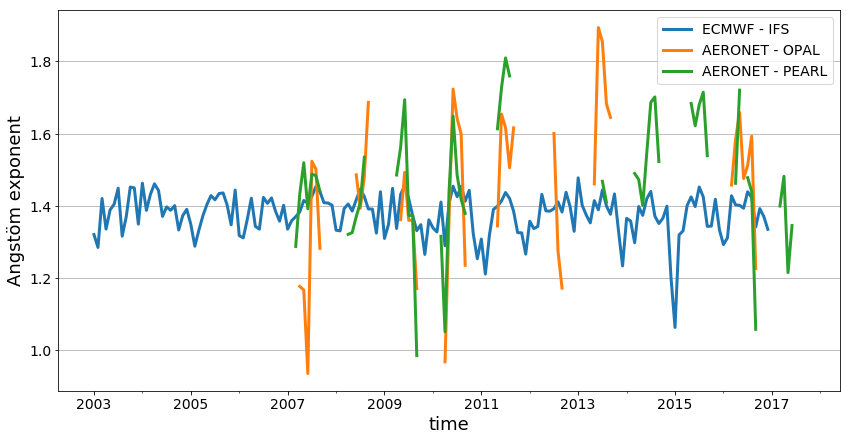

In [29]:
fig = plt.figure(figsize=(14,7))
#fig.suptitle('Ang. exp. at 80n, 15E in 2010',  y=1.05, fontsize=17)

time_series = ecmwf_data_ang['ang4487aer'].sel(
    lat=eureka_data['PEARL'].latitude, 
    lon=360+eureka_data['PEARL'].longitude, method='nearest')
time_series.to_series().resample('M').mean().plot(
    linewidth=3, label='ECMWF - IFS')

eureka_data[0].ang4487aer.resample('M').mean().plot(
    label='AERONET - OPAL', linewidth=3)
eureka_data[1].ang4487aer.resample('M').mean().plot(
    label='AERONET - PEARL', linewidth=3)

plt.grid(True, axis='y')
plt.ylabel('Angstöm exponent')
plt.legend()

*Fig. 14: Monthly averaged Angstöm exponent time series (observations and models).*

Large differences between model data and observations are expressed in figure 14. Model data present a smaller amplitude than the observations, although the slopes have, in general, the same sign. On the other hand, observations in Opal are less correlated with observations in Pearl compared to the AOD data. All these observations are in line with the results of the regression analysis. 

#### AOD and Angström exponent

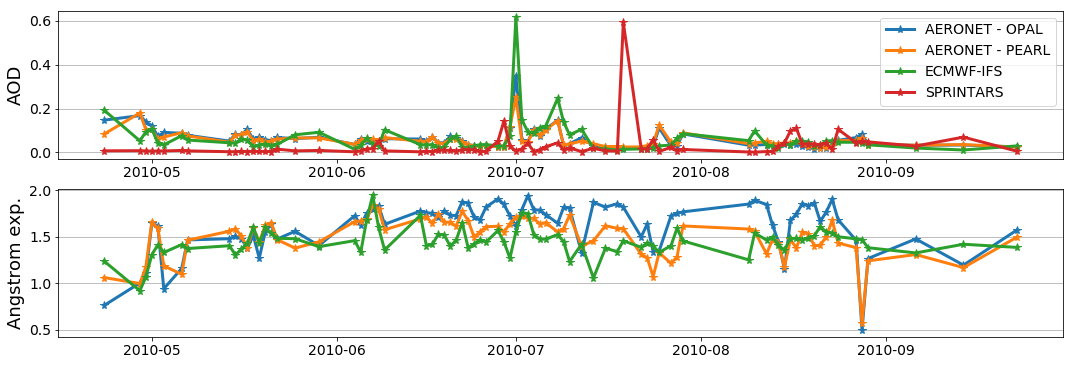

In [30]:
fig = plt.figure(figsize=(18, 6))

plt.subplot(2,1,1)
num_obs_2010 = num_obs.loc['20100101':'20101231']

plt.plot(num_obs_2010['aod_OPAL'], linewidth=3, 
         label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(num_obs_2010['aod_PEARL'], linewidth=3, 
         label = 'AERONET - PEARL', marker='*', markersize=8)
plt.plot(num_obs_2010['ecmwf_aod_PEARL'], linewidth=3, 
         label = 'ECMWF-IFS', marker='*', markersize=8)
plt.plot(num_obs_2010['sprintars_aod_PEARL'], linewidth=3, 
         label = 'SPRINTARS', marker='*', markersize=8)
plt.ylabel('AOD')
plt.legend()
plt.grid(True, axis='y')

plt.subplot(2,1,2)
plt.plot(num_obs_2010['ang_OPAL'], linewidth=3, 
         label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(num_obs_2010['ang_PEARL'], linewidth=3, 
         label = 'AERONET - PEARL', marker='*', markersize=8)
plt.plot(num_obs_2010['ecmwf_ang_PEARL'], linewidth=3, 
         label = 'ECMWF-IFS', marker='*', markersize=8)
plt.ylabel('Angstrom exp.')
plt.grid(True, axis='y')

#plt.savefig('results/aod_ang_timeseries_2010.png')

*Fig. 15: Time series of daily AOD (upper panel) and Angström exponent (lower panel) of observations and model data for the year 2010.*

Figure 15 shows also time series of AOD and Angström exponent but only for the year 2010 and daily values instead of monthly means. Hence, this figure provides more details and allows us to identify specific events, without smoothing out the high values of AOD and the respective low values of Angström exponent. Only the year 2010 was selected because outputs from the SPRINTARS model, which has a relatively high resolution, are available and there are many observations in both stations. All the data sets capture the event of the 1st of July, but the ECMWF-IFS reanalysis shows higher (lower) AOD (Angström exponent) values than the observations while the SPRINTARS model shows lower AOD values and peaks one day before the observations. A low Angström exponent is associated with large particles in the column, which could be originated in volcanic eruptions or fires.

#### Bias

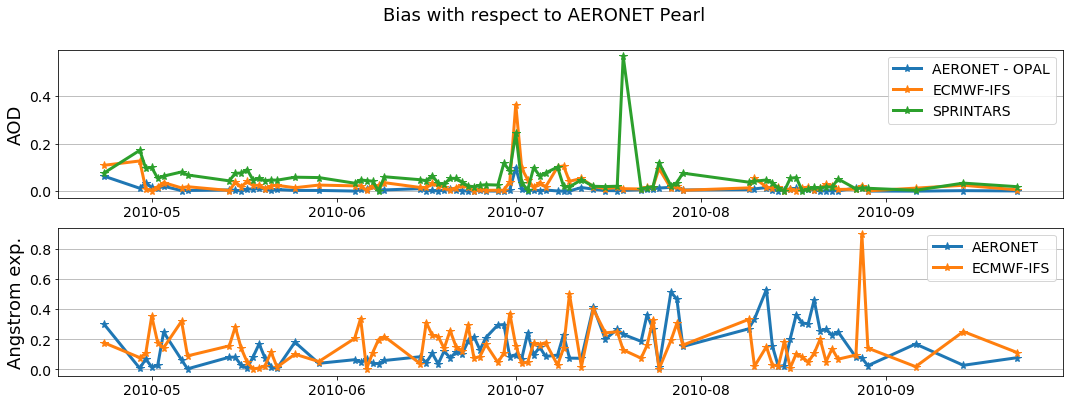

In [31]:
fig = plt.figure(figsize=(18, 6))
fig.suptitle('Bias with respect to AERONET Pearl')

plt.subplot(2,1,1)

bias_opal_aod = abs(num_obs_2010['aod_PEARL'] - 
                    num_obs_2010['aod_OPAL'])
bias_ecmwf_aod = abs(num_obs_2010['aod_PEARL'] - 
                     num_obs_2010['ecmwf_aod_PEARL'])
bias_sprintars_aod = abs(num_obs_2010['aod_PEARL'] - 
                         num_obs_2010['sprintars_aod_PEARL'])

plt.plot(bias_opal_aod, linewidth=3, 
         label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(bias_ecmwf_aod, linewidth=3, 
         label = 'ECMWF-IFS', marker='*', markersize=8)
plt.plot(bias_sprintars_aod, linewidth=3, 
         label = 'SPRINTARS', marker='*', markersize=8)
plt.ylabel('AOD')
plt.legend()
plt.grid(True, axis='y')

plt.subplot(2,1,2)

bias_opal_ang = abs(num_obs_2010['ang_PEARL'] - 
                    num_obs_2010['ang_OPAL'])
bias_ecmwf_ang = abs(num_obs_2010['ang_PEARL'] - 
                     num_obs_2010['ecmwf_ang_PEARL'])

plt.plot(bias_opal_ang, linewidth=3, 
         label = 'AERONET', marker='*', markersize=8)
plt.plot(bias_ecmwf_ang, linewidth=3, 
         label = 'ECMWF-IFS', marker='*', markersize=8)
plt.legend()
plt.ylabel('Angstrom exp.')
plt.grid(True, axis='y')

# plt.savefig('results/aod_ang_timeseries_2010_bias.png')

*Fig. 16: Bias of daily AOD (upper panel) and Angström exponent (lower panel) with respect to the AERONET Pearl station for the year 2010.*

The bias, computed as the difference between the measurements in the stations Pearl and Opal or one of the models is plotted in figure 16. The models present typically higher bias with respect to AERONET and, as seen before, the bias is higher for the Angström exponent than the AOD most of the time.

In [32]:
print('Bias: AOD, AERONET Opal-Pearl = ', 
      round(bias_opal_aod.sum(), 2))
print('Bias: AOD, AERONET - ECMWF-IFS Pearl = ', 
      round(bias_ecmwf_aod.sum(), 2))
print('Bias: AOD, AERONET - SPRINTARS Pearl = ', 
      round(bias_sprintars_aod.sum(), 2))

print('Bias: Ang. exp., AERONET Opal-Pearl = ', 
      round(bias_opal_ang.sum(), 2))
print('Bias: Ang. exp., AERONET - ECMWF-IFS Pearl = ', 
      round(bias_ecmwf_ang.sum(), 2))

Bias: AOD, AERONET Opal-Pearl =  0.69
Bias: AOD, AERONET - ECMWF-IFS Pearl =  2.36
Bias: AOD, AERONET - SPRINTARS Pearl =  4.41
Bias: Ang. exp., AERONET Opal-Pearl =  12.63
Bias: Ang. exp., AERONET - ECMWF-IFS Pearl =  12.82


The bias with respect to the Pearl AERONET stations for the station OPAL, the ECMSWF-IFS reanalysis and the model SPRINTARS is listed above. As expected from the previous figures, the bias for the AOD is smaller than for the Angström exponent (one order of magnitude). It is also larger for SPRINTARS than for ECMWF.

##### Zoom

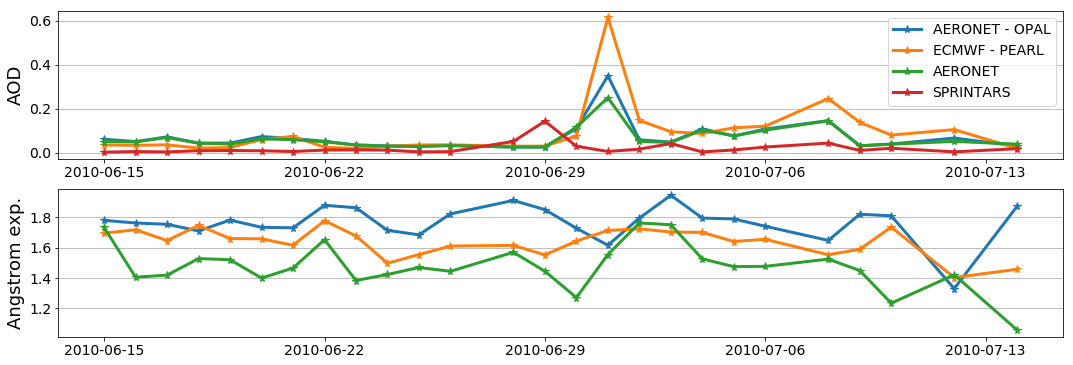

In [33]:
fig = plt.figure(figsize=(18, 6))

plt.subplot(2,1,1)
num_obs_july = num_obs.loc['20100615':'20100715']

plt.plot(num_obs_july['aod_OPAL'], linewidth=3, 
         label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(num_obs_july['ecmwf_aod_PEARL'], linewidth=3, 
         label = 'ECMWF - PEARL', marker='*', markersize=8)
plt.plot(num_obs_july['aod_PEARL'], linewidth=3, 
         label = 'AERONET', marker='*', markersize=8)
plt.plot(num_obs_july['sprintars_aod_PEARL'], 
         linewidth=3, label = 'SPRINTARS', marker='*', markersize=8)
plt.ylabel('AOD')
plt.legend()
plt.grid(True, axis='y')


plt.subplot(2,1,2)
plt.plot(num_obs_july['ang_OPAL'], linewidth=3, 
         label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(num_obs_july['ang_PEARL'], linewidth=3, 
         label = 'AERONET - PEARL', marker='*', markersize=8)
plt.plot(num_obs_july['ecmwf_ang_PEARL'], linewidth=3, 
         label = 'ECMWF', marker='*', markersize=8)
plt.ylabel('Angstrom exp.')
plt.grid(True, axis='y')

#plt.savefig('results/aod_ang_timeseries_2010_zoom.png')

*Fig. 17: As figure 15, but from the middle of June to the middle of July (2010).*

Figure 17 is generated as figure 15, but zooming into the period 15.06.2010-14.06.2010. This figure provides more details around the event of the 1st. of July. 

#### Climatology

In [34]:
#num_obs.resample
num_obs_xarray = num_obs.to_xarray()
num_obs_clima = num_obs_xarray.groupby(
    'index.month').mean('index')

s_aod = num_obs_clima.aod_OPAL.to_series()
s_ang = num_obs_clima.ang_OPAL.to_series()
s_aod.index.values

base_date = np.datetime64('2010', 'Y')
months_rel = s_aod.index.values -1
dates = base_date + months_rel.astype('timedelta64[M]')

s_aod.index = dates
s_ang.index = dates

#### Monthly average 2010

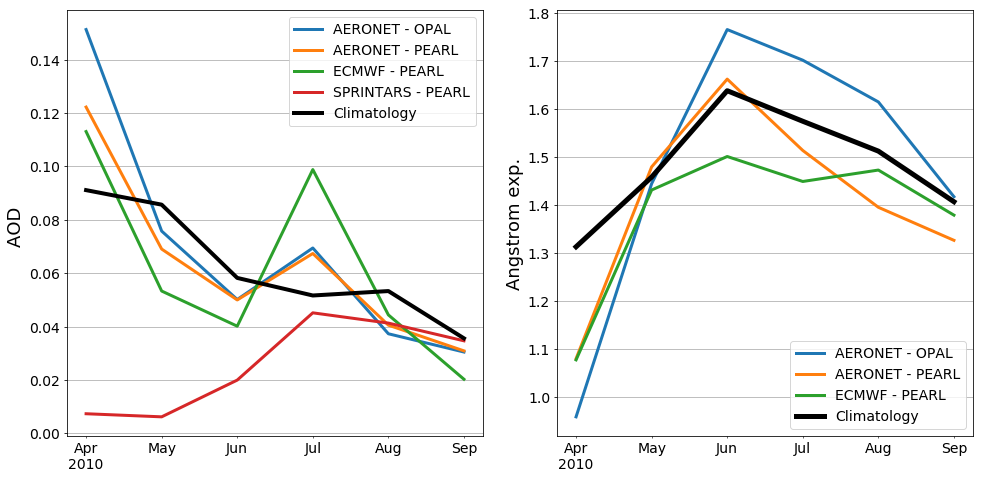

In [35]:
fig = plt.figure(figsize=(14,7))
#fig.suptitle('AOD at 80N, 15E in 2010',  y=1.05, fontsize=17)
plt.subplot(1, 2, 1)
time_series_opal = num_obs_2010['aod_OPAL'].resample(
    'M').mean().plot(linewidth = 3, label='AERONET - OPAL')
time_series_pearl = num_obs_2010['aod_PEARL'].resample(
    'M').mean().plot(linewidth = 3, label='AERONET - PEARL')
time_series_ecmwf = num_obs_2010['ecmwf_aod_PEARL'].resample(
    'M').mean().plot(linewidth = 3, label='ECMWF - PEARL')
time_series_sprintars = num_obs_2010['sprintars_aod_PEARL'].resample(
    'M').mean().plot(linewidth = 3, label='SPRINTARS - PEARL')
s_aod.plot(label='Climatology', linewidth=4, c='k')
plt.legend()
plt.grid(True, axis='y')
plt.ylabel('AOD ')

plt.subplot(1, 2, 2)
time_series_opal = num_obs_2010['ang_OPAL'].resample(
    'M').mean().plot(linewidth = 3, label='AERONET - OPAL')
time_series_pearl = num_obs_2010['ang_PEARL'].resample(
    'M').mean().plot(linewidth = 3, label='AERONET - PEARL')
time_series_ecmwf = num_obs_2010['ecmwf_ang_PEARL'].resample(
    'M').mean().plot(linewidth = 3, label='ECMWF - PEARL')
s_ang.plot(label='Climatology', linewidth=5, c='k')

plt.ylabel('Angstrom exp.')
plt.legend()
plt.grid(True, axis='y')
fig.tight_layout() 

#plt.savefig('results/aod_ang_monthlymean_2010_zoom.png')

*Fig. 18: Monthly mean values of AOD (left panel) and Angström exponent (right panel) in 2010 and climatology.*

The expected seasonal cycle of AOD, with higher values in the spring (Arctic haze), and Angström exponent (with higher values in the summer) is manifested in figure 18, even though the climatology was calculated from a few years of data and not evenly distributed over the period. The curves are more spread during the summer, coinciding with the event. It is evident that the AOD peaks in July. Besides, the SPRINTARS model does not follow the climatology nor the 2010 curves of the other data sets. 

### Maps

<Figure size 1440x720 with 0 Axes>

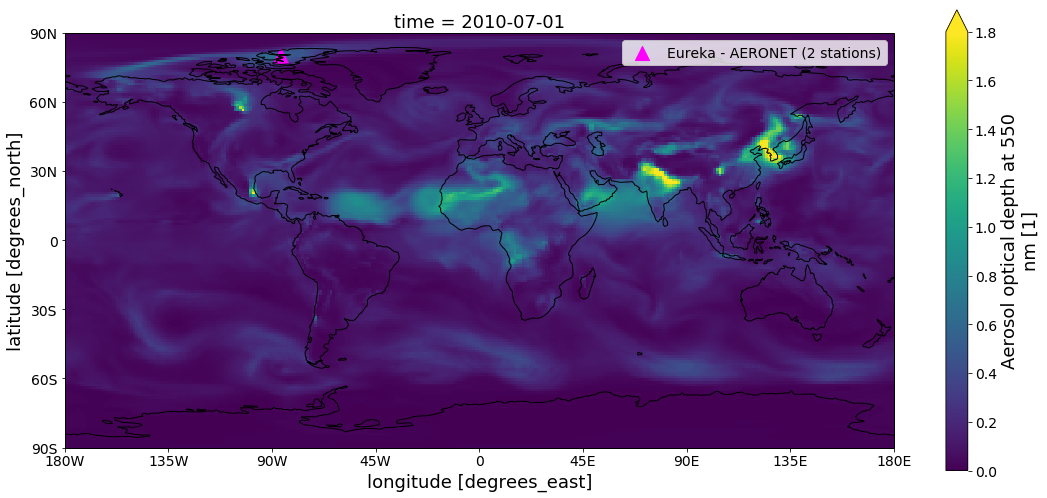

In [36]:
# Uncomment to zoom in

plt.figure(figsize=(20,10))
ax = eureka_data.plot_station_coordinates(
    marker='^', markersize=200, color='magenta',  label='Eureka - AERONET')
# ax.set_ylim(90, 50) 
# ax.set_xlim(-120, -70)

map_data = ecmwf_data['od550aer'].sel(
    time = '2010-07-01T01', method='nearest')
# map_data = map_data.sel(lat=slice(90,50), lon=slice(360-120, 360-70))
map_data.plot(zorder=0, vmin=0, vmax=1.8)

ax.set_xlabell = ('longitude')
ax.set_ylabel = ('latitude')
# plt.savefig('results/map_ecmwf_01072010.png')

*Fig. 19: AOD field the 1st of July (ECMWF-IFS data).*

Figure 19 shows the field of AOD for the 1st. of July, generated from the reanalysis data. There is a clear local maximum in northern Canada during this day that may have affected the measurement in Eureka due to the regional atmospheric circulation. Actually, several wildfires affected the northern part of the continent during the second half of June.

In [ ]:

plt.figure(figsize=(20,10))


ax = eureka_data.plot_station_coordinates(
    marker='^', markersize=200, color='magenta',  label='Eureka - AERONET')
ax.set_ylim(90, 50) 
ax.set_xlim(-120, -70)

map_data = sprintars_data['od550aer'].sel(
    time = '2010-07-01T01', method='nearest')
map_data = map_data.sel(lat=slice(90,50), lon=slice(360-120, 360-70))
map_data.plot(zorder=0, vmin=0, vmax=1.8)

ax.set_xlabell = ('longitude')
ax.set_ylabel = ('latitude')
#plt.savefig('results/map_ecmwf_01072010_sprintars_zoom.png')

<img src="files/results/map_ecmwf_01072010_sprintars_zoom.png">

*Fig. 20: AOD field the 1st of July (SPRINTARS data).*

The SPRINTARS model predicts the high AOD levels as well, but the simulation shows the aerosols north of the AERONET stations. This might be the reason why the peak in the time series in figure 15 is lower for the SPRINTARS than for the rest of the observations.

<Figure size 1440x720 with 0 Axes>

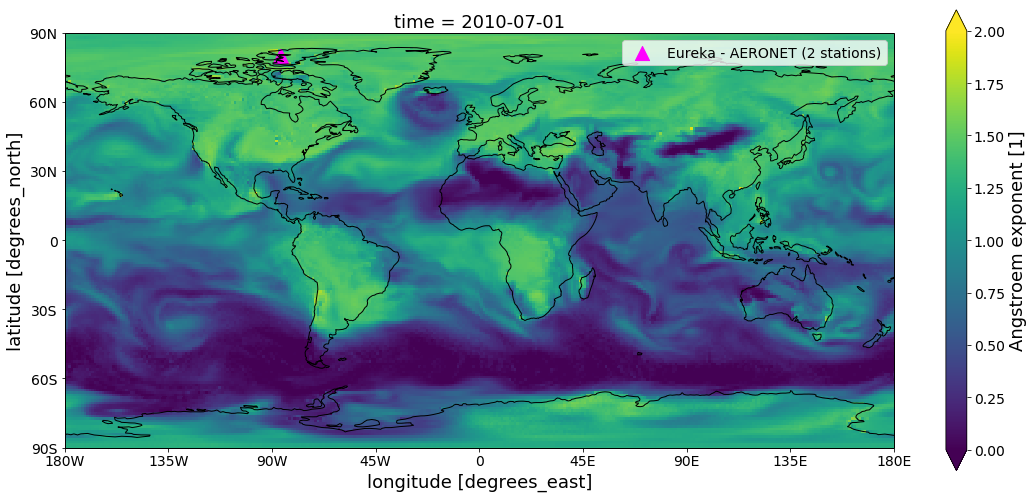

In [39]:
plt.figure(figsize=(20,10))


ax = eureka_data.plot_station_coordinates(
    marker='^', markersize=200, color='magenta',  label='Eureka - AERONET')
#ax.set_ylim(90, 50)
#ax.set_xlim(-120, -70)

map_data = ecmwf_data_ang['ang4487aer'].sel(
    time = '2010-07-01T01', method='nearest')
#map_data = map_data.sel(lat=slice(90,50), lon=slice(360-120, 360-70))
map_data.plot(zorder=0, vmin=0, vmax=2.0)

ax.set_xlabell = ('longitude')
ax.set_ylabel = ('latitude')
#plt.savefig('results/map_ecmwf_01072010_ang.png')

In [40]:
"""plt.figure(figsize=(20,10))


ax = eureka_data.plot_station_coordinates(
    marker='^', markersize=200, color='blue', ax=ax1, label='Eureka - AERONET')
ax.set_ylim(90, 55)
ax.set_xlim(-110, -60)

map_data = ecmwf_data['ang'].sel(time = '2010-06-29T01', method='nearest')
map_data = map_data.sel(lat=slice(90,55), lon=slice(360-110, 360-60))
map_data.plot(zorder=0)
"""

"plt.figure(figsize=(20,10))\n\n\nax = eureka_data.plot_station_coordinates(marker='^', markersize=200, color='blue', ax=ax1, label='Eureka - AERONET')\nax.set_ylim(90, 55)\nax.set_xlim(-110, -60)\n\nmap_data = ecmwf_data['ang'].sel(time = '2010-06-29T01', method='nearest')\nmap_data = map_data.sel(lat=slice(90,55), lon=slice(360-110, 360-60))\nmap_data.plot(zorder=0)\n"

<img align="right" src="images/Canada.A2010182.1935.1km.jpg">
<img align="left" src="images/fires.png">

*Fig 21: MODIS-Aqua image from the 1st of July showing wildfires in Saskatchewan, Canada*

The MODIS - AQUA image in the figure above shows wildfires in Saskatchewan, Canada, the same day of the event discussed. As can be seen in the thumbnail, the region of the image coincides with that of the maximum AOD identified in the reanalysis map in figure 19. These fires could be a possible explanation of the high AOD values.

# Discussion and outlook

The spatial variability the AOD and the Angström exponent within a grid box was evaluated from two AERONET stations located in the Arctic very close to each other, inside the boundaries of an ECMWF_IFS reanalysis pixel in Eureka, northern Canada. Both sites show very high correlation for the AOD, and the bias can partly be explained by the difference in altitude of the stations. The Angström exponent presents a lower correlation than the AOD. The OLS fit was good for the AERONET stations, but the variance explained was less for the models (almost zero for the Angström exponent).

The number of observations varies in time and from one station to another. The relationship between the bias and the normalized difference in the number of observations between the stations was explored, but no evident pattern was found.
Difference in altitude explains diff in AOD

An important event was identified the 1st. of July 2010. Given the MODIS-AQUA images and the AOD field from the reanalysis, we suspect that this event is associated with wildfires in northern Canada and advection of aerosols from that region. Both SPRINTARS and ECMWF-IFS detected this. However, the ECMWF seems to overestimate (underestimate) the AOD (Angström exponent), whereas the SPRINTARS spots the high AOD values one day before and further north. It would be interesting to compare the results with the circulation patterns in order to confirm the origin of the high AOD values in Eureka.


One of the major challenges to future modeling is determining how to account for the subgrid variability of aerosols. Therefore, long time series of high measurements in more sites in the Arctic are recommended, in order to achieve a more robust spatial analysis that would lead to an improvement of the model's performance applied to aerosols.

Although in an early stage, the pyarecom library was proved to be an extremely useful tool for processing and plotting of both gridded and non-gridded data. Nevertheless, it should continue to be developed and tested.


# Conclusions

AOD and Angström exponent observations in the Arctic from different AERONET stations were compared to model simulations in one grid box. Measurements in the Arctic are sparse and cover short periods, making it difficult to find stations that are close to each other with the same temporal coverage and generalize the results.

The AERONET observations in the Arctic of AOD, with a maximum in spring, and Angström exponent, with a maximum in summer, are consistent with previous studies. It is also known that measurements are more uncertain during summer when AOD is lower.

In general, the bias is higher for the models than for the observations. AOD measurements correlate well, although OPAL measures higher (lower) values in the summer (spring). Part of the deviation might be explained by the altitude difference.
On the other hand, the Ansgröm coefficient presents a lower correlation, especially between models and observations.


# References

Weigum, N., Schutgens, N., and Stier, P.: Effect of aerosol subgrid variability on aerosol optical depth and cloud condensation nuclei: implications for global aerosol modelling, Atmos. Chem. Phys., 16, 13619-13639, https://doi.org/10.5194/acp-16-13619-2016, 2016.


Wang, R., Andrews, E., Balkanski, Y., Boucher, O., Myhre, G., Samset, B. H., et al. (2018). Spatial representativeness error in the ground‐level observation networks for black carbon radiation absorption. Geophysical Research Letters, 45, 2106–2114. https://doi.org/10.1002/2017GL076817


# Acknowledgments

I would like to thank NAROM Andøya Space Center for hosting the course and UNINETT sigma2 -the National Infrastructure for High Performance Computing and Data storage in Norway- for providing computational resources. 